In [1]:
import io

import numpy as np
import cv2
import onnxruntime
import ultralytics
from ultralytics import YOLO


# Local packages

ultralytics.checks()

      
    
class Yolov8Detector():

    def __init__(self, model_path='yolov8n-face.onnx', size=(640, 640), classes={0: 'face'}, model_name="yolov8") -> None:
        """
        Initialize the MyDetector object.

        Args:
            model_path (str): Path to the model file.
            size (tuple): Size of the input image.

        Returns:
            None
        """
#         self._session = onnxruntime.InferenceSession(model_path)
#         self.input_name = self._session.get_inputs()[0].name
#         self.output_names = [self._session.get_outputs()[0].name]
        self._size = size
        self.classes = classes
        self.model_name = model_name
        self.model = YOLO(model_path, task='detect')
    

    def video_run(self, cap):
        """
        Process video frames and draw bboxes.

        Args:
            cap: Video capture object.

        Returns:
            io.BytesIO: In-memory file containing the processed video.
        """
        fps = int(cap.get(cv2.CAP_PROP_FPS))

        
        # Video stream handling 
        output_memory_file = io.BytesIO()
        output_f = av.open(output_memory_file, 'w', format='mp4')  # Open "in memory file" as MP4 video output
        stream = output_f.add_stream('h264', str(fps))  # Add H.264 video stream to the MP4 container, with framerate = fps.
        stream.width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        stream.height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        # Video capturing
        while True:
            ret, frame = cap.read()
            if not ret:
                break
                
            #find bounding boxes and track them via YOLO model method    
            results = self.model.track(frame, persist=True, conf=0.23, iou = 0.8, tracker='bytetrack.yaml')
#             results = self.model.predict(frame, conf=0.23 , iou=0.8)
            
            #draw bboxes
            annotated_frame = results[0].plot()
#             print(annotated_frame.shape)
            # Convert image from NumPy Array to frame.
            annotated_frame = av.VideoFrame.from_ndarray(annotated_frame, format='bgr24') 
            packet = stream.encode(annotated_frame)  # Encode video frame
            output_f.mux(packet)  # "Mux" the encoded frame (add the encoded frame to MP4 file).
            
        # Flush the encoder
        packet = stream.encode(None)
        output_f.mux(packet)
        output_f.close()
        return output_memory_file
    
    def draw_box(self, img):
        output = self.model.predict(img, conf= 0.23, iou = 0.8)
        output_img = output[0].plot()
        return output_img
    
    
    def __call__(self, img):
        return self.draw_box(img)




Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
Setup complete ✅ (80 CPUs, 754.5 GB RAM, 4251.4/4434.8 GB disk)


In [ ]:
import cv2
import av
from IPython.display import Video
# Define the path to the input video file
input_video_path = 'ЖД_Вокзал_11_ЖД_Вокзал_11_03_04_2024_08_15_00_03_04_2024_08_35_00.mp4'

# Define the path to the output video file
output_video_path = 'video/output_video_ZHDvokzal.mp4'

# Open the input video file for reading
input_video = cv2.VideoCapture(input_video_path)

# Check if the video file was successfully opened
if not input_video.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Create an instance of the Yolov8Detector class
detector = Yolov8Detector()
print(input_video)
# Process the video frames and save the processed video
with detector.video_run(input_video) as output_memory_file:
    with open(output_video_path, "wb") as f:
        f.write(output_memory_file.getbuffer())

# Release the input video file
input_video.release()

print("Video processing complete. Output video saved to:", output_video_path)


< cv2.VideoCapture 0x7f8781017f90>
Loading yolov8n-face.onnx for ONNX Runtime inference...



2024-04-11 09:47:58.316026103 [E:onnxruntime:Default, provider_bridge_ort.cc:1548 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1209 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_cuda.so with error: libcublasLt.so.11: cannot open shared object file: No such file or directory

2024-04-11 09:47:58.316056207 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:861 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirementsto ensure all dependencies are met.


0: 640x640 5 faces, 53.2ms
Speed: 23.2ms preprocess, 53.2ms inference, 517.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 faces, 56.0ms
Speed: 3.9ms preprocess, 56.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 faces, 54.4ms
Speed: 2.3ms preprocess, 54.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 faces, 54.8ms
Speed: 2.8ms preprocess, 54.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 faces, 52.4ms
Speed: 2.4ms preprocess, 52.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 faces, 52.8ms
Speed: 2.5ms preprocess, 52.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 faces, 47.8ms
Speed: 2.5ms preprocess, 47.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 faces, 48.0ms
Speed: 2.7ms preprocess, 48.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640

Loading yolov8n-face.onnx for ONNX Runtime inference...

0: 640x640 2 faces, 53.0ms
Speed: 2.8ms preprocess, 53.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


2024-04-06 08:40:00.604848891 [E:onnxruntime:Default, provider_bridge_ort.cc:1548 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1209 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_cuda.so with error: libcublasLt.so.11: cannot open shared object file: No such file or directory

2024-04-06 08:40:00.604871747 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:861 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirementsto ensure all dependencies are met.


(720, 1280, 3)


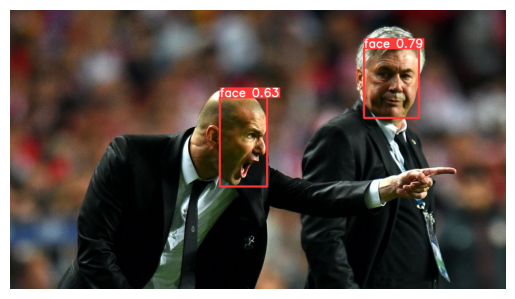

In [82]:
import matplotlib.pyplot as plt


# Создаем экземпляр детектора
detector = Yolov8Detector()

# Загружаем изображение для тестирования
image_path = 'zidane.jpg'
image = cv2.imread(image_path)

# Выполняем детекцию
result_image = detector(image)

result_image= cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
print(result_image.shape)
# Отображаем результаты с помощью Matplotlib
plt.imshow(result_image)
plt.savefig('transformed_image.jpg')  # Save the image to a file
plt.axis('off')
plt.show()